In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_sdv = pd.read_csv('D:\SummerResearch\data\\adult\onehot_adult_sdv_100k.csv')
df_gauss = pd.read_csv('D:\SummerResearch\data\\adult\onehot_adult_sdv_gaussian_100k.csv')
df_cat = pd.read_csv('D:\SummerResearch\data\\adult\onehot_adult_sdv_categorical_100k.csv')


In [41]:
print(df_sdv['income'].value_counts())
print(df_gauss['income'].value_counts())
print(df_cat['income'].value_counts())


income
0    69831
1    30169
Name: count, dtype: int64
income
0    96621
1     3379
Name: count, dtype: int64
income
0    71639
1    28361
Name: count, dtype: int64


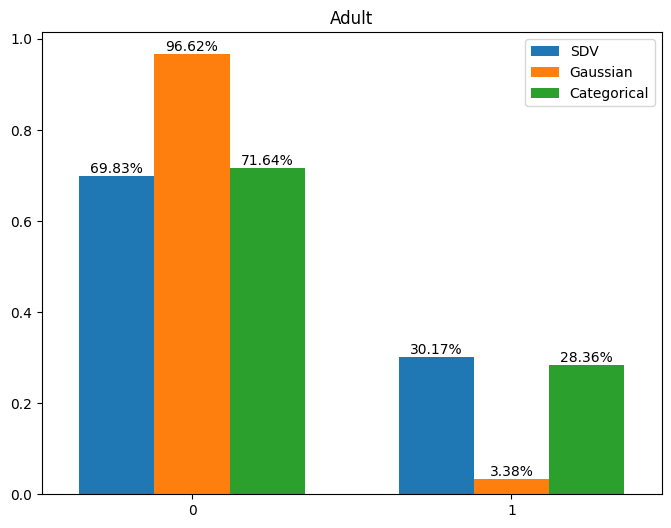

In [110]:
def plot_label_hist_compare(df_list, label_list, target_name, title):
    col_width = 0.2  # Width of each bar
    group_width = col_width * len(df_list) + 0.25  # Total width for each group, with padding
    all_x_values = []

    unique_labels = sorted(set([label for df in df_list for label in df[target_name].unique()]))

    # Set a larger figure size
    plt.figure(figsize=(len(unique_labels)*4, 6))  # Adjust width and height as needed

    for i in range(len(df_list)):
        # Calculate x-values with space between categories
        x_values = [label * group_width + i * col_width for label in unique_labels]
        all_x_values.extend(x_values)  # Collect x-values for adjusting limits

        total = df_list[i][target_name].value_counts().sum()
        y_values = df_list[i][target_name].value_counts().values / total

        plt.bar(
            x=x_values,
            height=y_values,
            width=col_width,
            label=label_list[i]
        )

        for x, y in zip(x_values, y_values):
            plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')

    # Set x-ticks to the middle of each group
    group_centers = [label * group_width + (len(df_list) - 1) * col_width / 2 for label in unique_labels]
    plt.xticks(ticks=group_centers, labels=unique_labels)

    plt.xlim(min(all_x_values) - col_width, max(all_x_values) + col_width)
    plt.title(title)
    plt.legend()
    plt.show()

plot_label_hist_compare([df_sdv, df_gauss, df_cat], ['SDV', 'Gaussian', 'Categorical'], 'income', 'Adult')

In [111]:
def eval_dataset(ds_name, target_name):
    df_ori = pd.read_csv(f'D:\SummerResearch\data\\{ds_name}\onehot_{ds_name}_train.csv')
    df_sdv = pd.read_csv(f'D:\SummerResearch\data\\{ds_name}\onehot_{ds_name}_sdv_100k.csv')
    df_gauss = pd.read_csv(f'D:\SummerResearch\data\\{ds_name}\onehot_{ds_name}_sdv_gaussian_100k.csv')
    df_cat = pd.read_csv(f'D:\SummerResearch\data\\{ds_name}\onehot_{ds_name}_sdv_categorical_100k.csv')   

    plot_label_hist_compare([df_ori, df_sdv, df_gauss, df_cat], ['original', 'SDV', 'Gaussian', 'Categorical'], target_name, f"{ds_name}")  

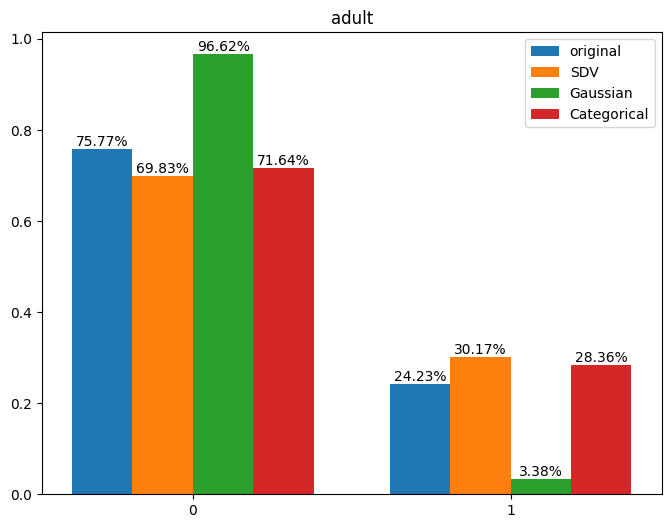

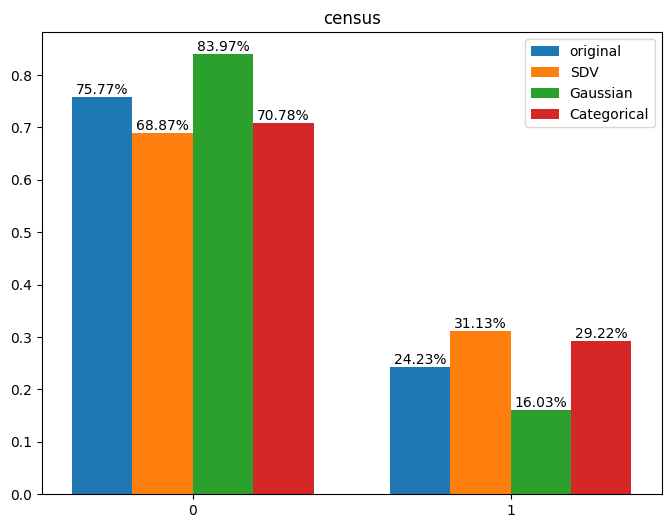

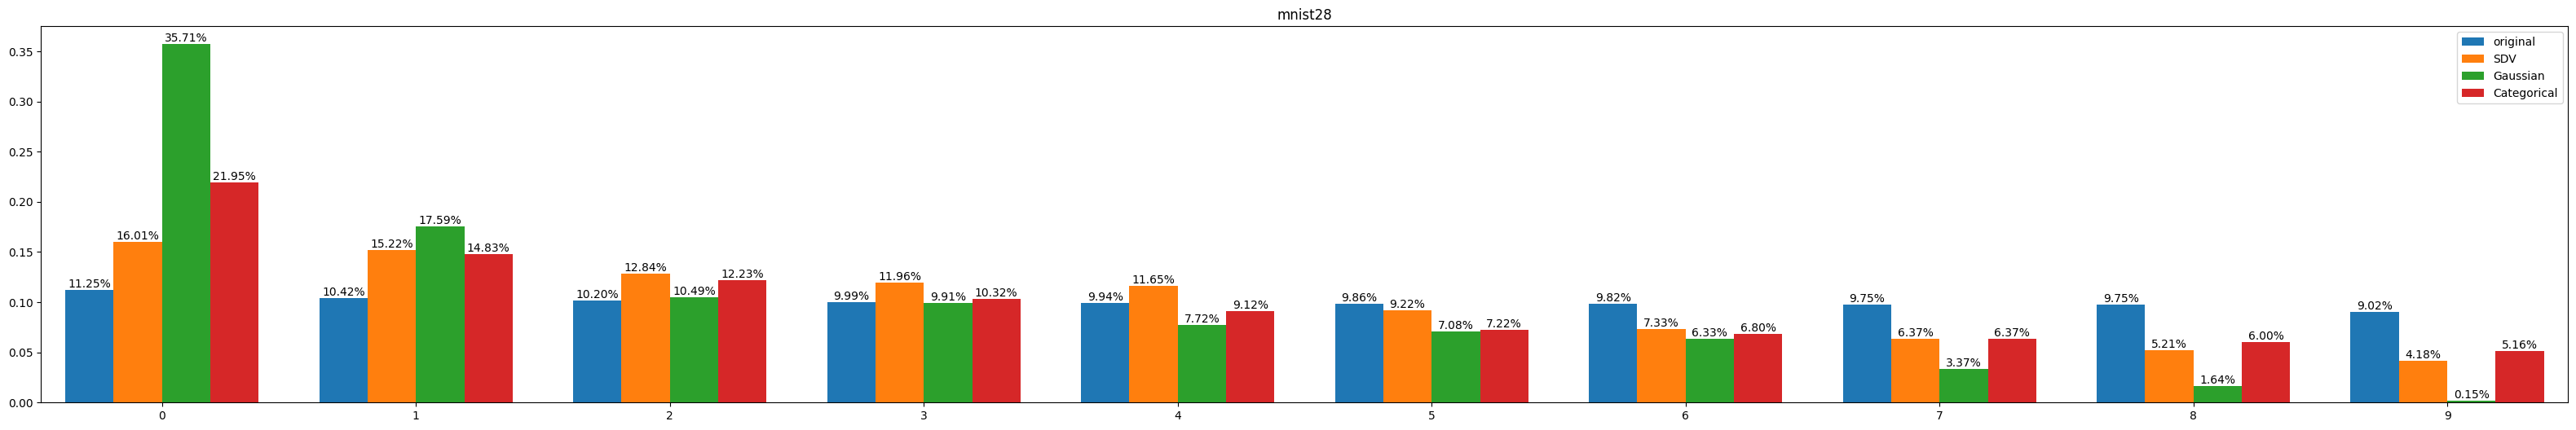

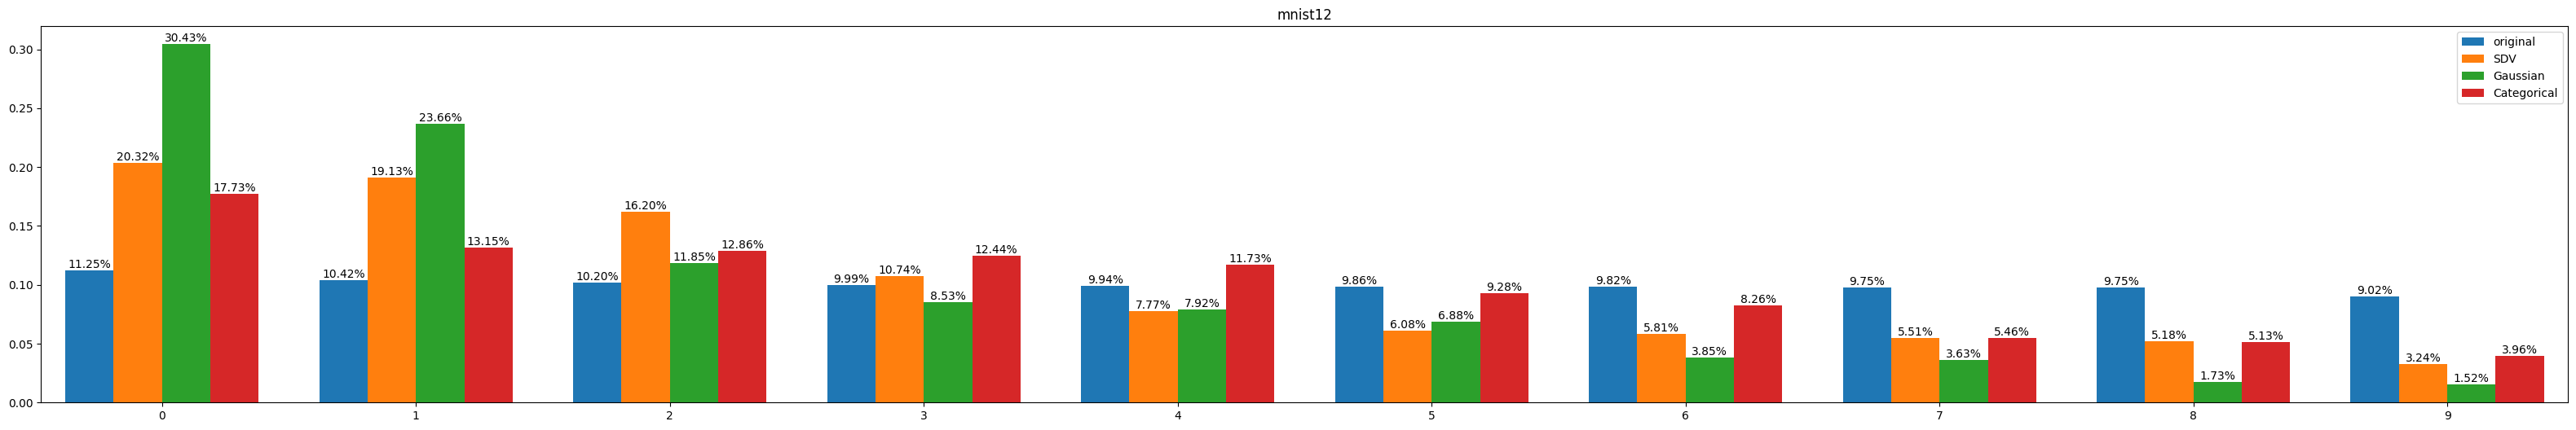

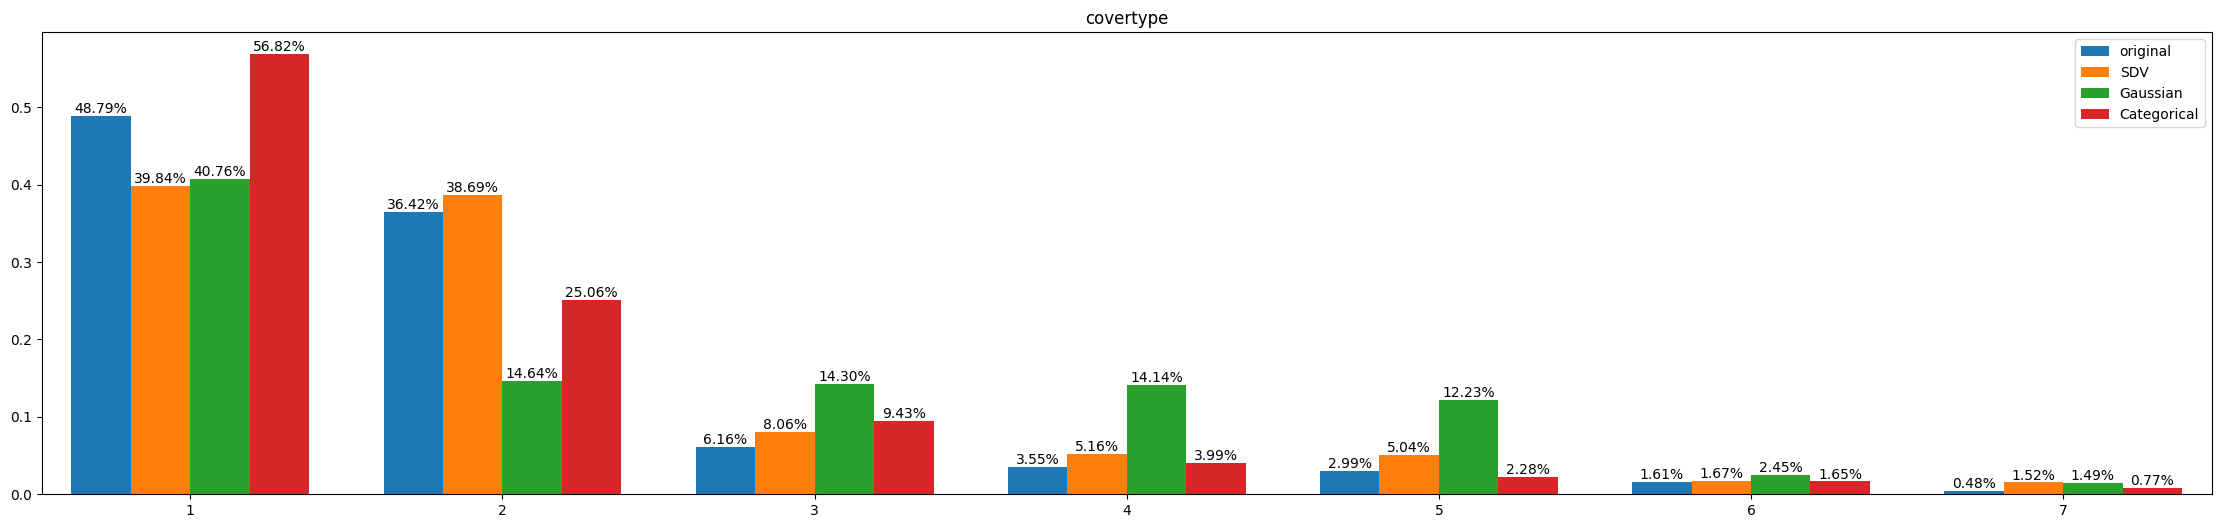

In [114]:
eval_dataset('adult', 'income')
eval_dataset('census', 'income')
eval_dataset('mnist28', 'label')
eval_dataset('mnist12', 'label')
eval_dataset('covertype', 'Cover_Type')